In [1]:
import sympy
import csv

def is_prime(num):
    return sympy.isprime(num)

def generate_primes(n):
    primes_plus = []
    primes_minus = []
    for a in range(1, n):
        p_plus = n * a + 1
        if p_plus >= 2 and is_prime(p_plus):
            primes_plus.append(p_plus)
        p_minus = n * a - 1
        if p_minus >= 2 and is_prime(p_minus):
            primes_minus.append(p_minus)
    return primes_plus, primes_minus

def count_twin_primes(primes):
    primes_sorted = sorted(primes)
    twin_count = 0
    for i in range(len(primes_sorted) - 1):
        if primes_sorted[i+1] - primes_sorted[i] == 2:
            twin_count += 1
    return twin_count

def main():
    with open('ddep_seek_primes_data3.csv', 'w', newline='') as csvfile:
        fieldnames = ['Number', 'Primes +1', 'Primes -1', 'Twins', 'Is Prime']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        
        for n in range(2, 1000):  # Adjust the range as needed
            primes_plus, primes_minus = generate_primes(n)
            all_primes = primes_plus + primes_minus
            twins = count_twin_primes(all_primes)
            is_n_prime = 'True' if is_prime(n) else 'False'
            writer.writerow({
                'Number': n,
                'Primes +1': len(primes_plus),
                'Primes -1': len(primes_minus),
                'Twins': twins,
                'Is Prime': is_n_prime
            })
            print(f"Number: {n}, Primes +1: {len(primes_plus)}, Primes -1: {len(primes_minus)}, Twins: {twins}, Is Prime: {is_n_prime}")

if __name__ == "__main__":
    main()

Number: 2, Primes +1: 1, Primes -1: 0, Twins: 0, Is Prime: True
Number: 3, Primes +1: 1, Primes -1: 2, Twins: 1, Is Prime: True
Number: 4, Primes +1: 2, Primes -1: 3, Twins: 3, Is Prime: False
Number: 5, Primes +1: 1, Primes -1: 1, Twins: 0, Is Prime: True
Number: 6, Primes +1: 4, Primes -1: 5, Twins: 4, Is Prime: False
Number: 7, Primes +1: 2, Primes -1: 2, Twins: 1, Is Prime: True
Number: 8, Primes +1: 2, Primes -1: 4, Twins: 0, Is Prime: False
Number: 9, Primes +1: 3, Primes -1: 3, Twins: 2, Is Prime: False
Number: 10, Primes +1: 5, Primes -1: 5, Twins: 2, Is Prime: False
Number: 11, Primes +1: 3, Primes -1: 2, Twins: 0, Is Prime: True
Number: 12, Primes +1: 6, Primes -1: 8, Twins: 4, Is Prime: False
Number: 13, Primes +1: 4, Primes -1: 1, Twins: 0, Is Prime: True
Number: 14, Primes +1: 5, Primes -1: 7, Twins: 1, Is Prime: False
Number: 15, Primes +1: 5, Primes -1: 5, Twins: 4, Is Prime: False
Number: 16, Primes +1: 5, Primes -1: 7, Twins: 2, Is Prime: False
Number: 17, Primes +1: 3

/tmp/ipykernel_327952/1028676460.py:10: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Columns combined and CSV file updated successfully.


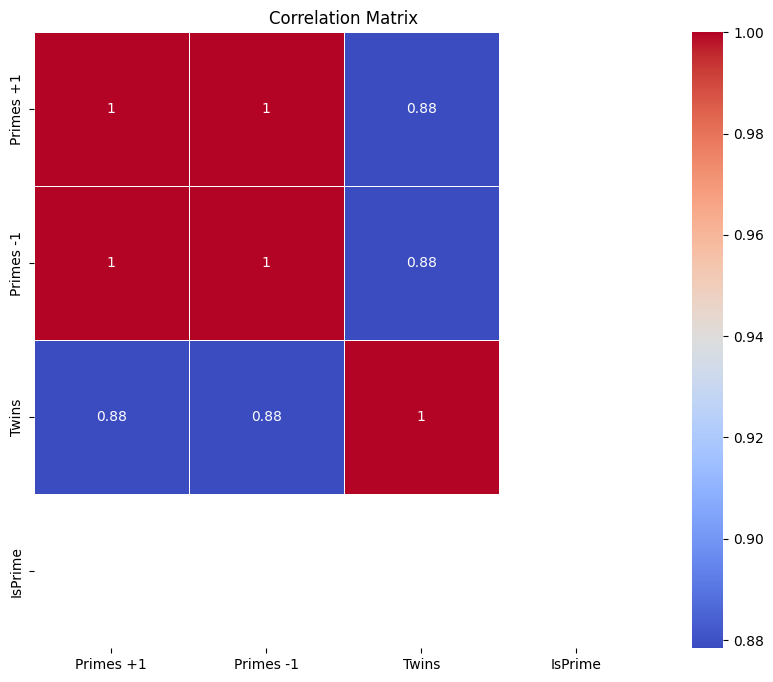

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import pandas as pd

# Step 1: Read the CSV file
file_path = 'primes_data_150000.txt'
df = pd.read_csv(file_path)

# Step 2: Combine the columns
# Assuming 'Is Prime' has precedence over 'isPrime'
df['IsPrime'] = df['Is Prime'].combine_first(df['isPrime'])

# Step 3: Drop the original columns if needed
df = df.drop(columns=['Is Prime', 'isPrime'])

# Step 4: Write the updated data back to the CSV file
df.to_csv("primes_data_150000_2.txt", index=False)

print("Columns combined and CSV file updated successfully.")
# Load the data
data = pd.read_csv('primes_data_150000_2.txt',low_memory=False)

# Convert 'Is Prime' to binary
data['IsPrime'] = data['IsPrime'].map({'True': 1, 'False': 0})

# Compute correlation matrix
corr = data[['Primes +1', 'Primes -1', 'Twins', 'IsPrime']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

              precision    recall  f1-score   support

       False       0.91      1.00      0.95     27278
        True       0.00      0.00      0.00      2722

    accuracy                           0.91     30000
   macro avg       0.45      0.50      0.48     30000
weighted avg       0.83      0.91      0.87     30000



/home/maher/programming/unusual_patterns/primes/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/maher/programming/unusual_patterns/primes/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/maher/programming/unusual_patterns/primes/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

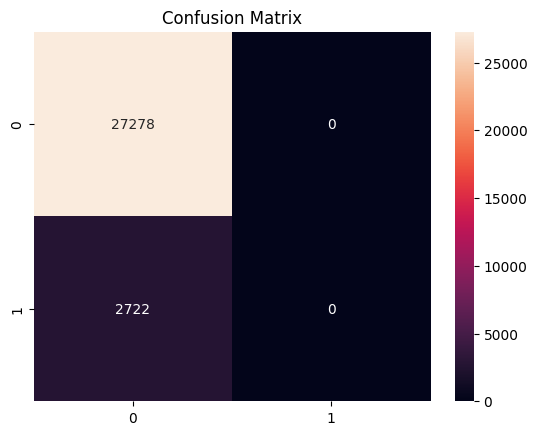

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


data = pd.read_csv('primes_data_150000_2.txt',low_memory=False)
# Features and target
X = data[['Primes +1', 'Primes -1']]
y = data['IsPrime']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [4]:
import pandas as pd
data = pd.read_csv('primes_data_150000_2.txt',low_memory=False)

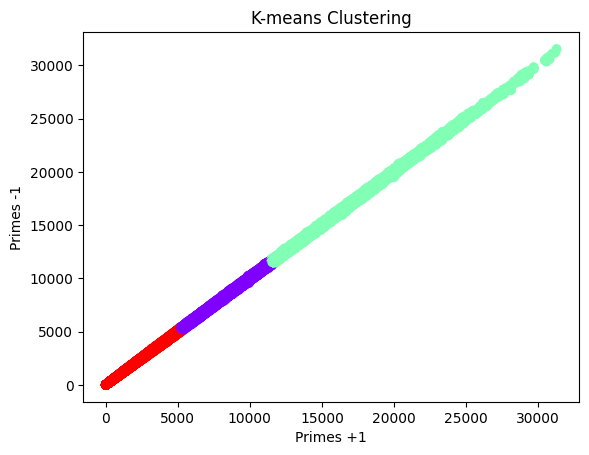

In [5]:
from sklearn.cluster import KMeans

# Select features
features = data[['Primes +1', 'Primes -1']]

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features)

# Add cluster labels
data['Cluster'] = clusters

# Plot clusters
plt.scatter(data['Primes +1'], data['Primes -1'], c=data['Cluster'], cmap='rainbow', marker='o')
plt.xlabel('Primes +1')
plt.ylabel('Primes -1')
plt.title('K-means Clustering')
plt.show()

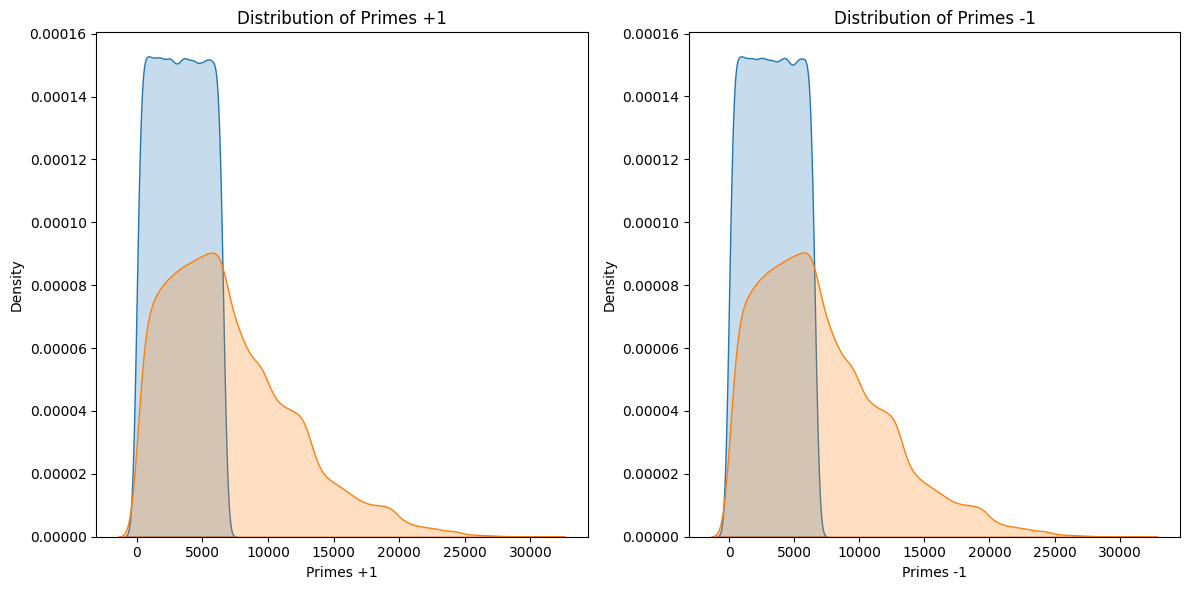

In [6]:
# Separate data
primes = data[data['IsPrime'] == 1]
non_primes = data[data['IsPrime'] == 0]

# Plot distributions
plt.figure(figsize=(12, 6))

# Primes +1
plt.subplot(1, 2, 1)
sns.kdeplot(primes['Primes +1'], label='Primes', fill=True)
sns.kdeplot(non_primes['Primes +1'], label='Non-Primes', fill=True)
plt.title('Distribution of Primes +1')

# Primes -1
plt.subplot(1, 2, 2)
sns.kdeplot(primes['Primes -1'], label='Primes', fill=True)
sns.kdeplot(non_primes['Primes -1'], label='Non-Primes', fill=True)
plt.title('Distribution of Primes -1')

plt.tight_layout()
plt.show()

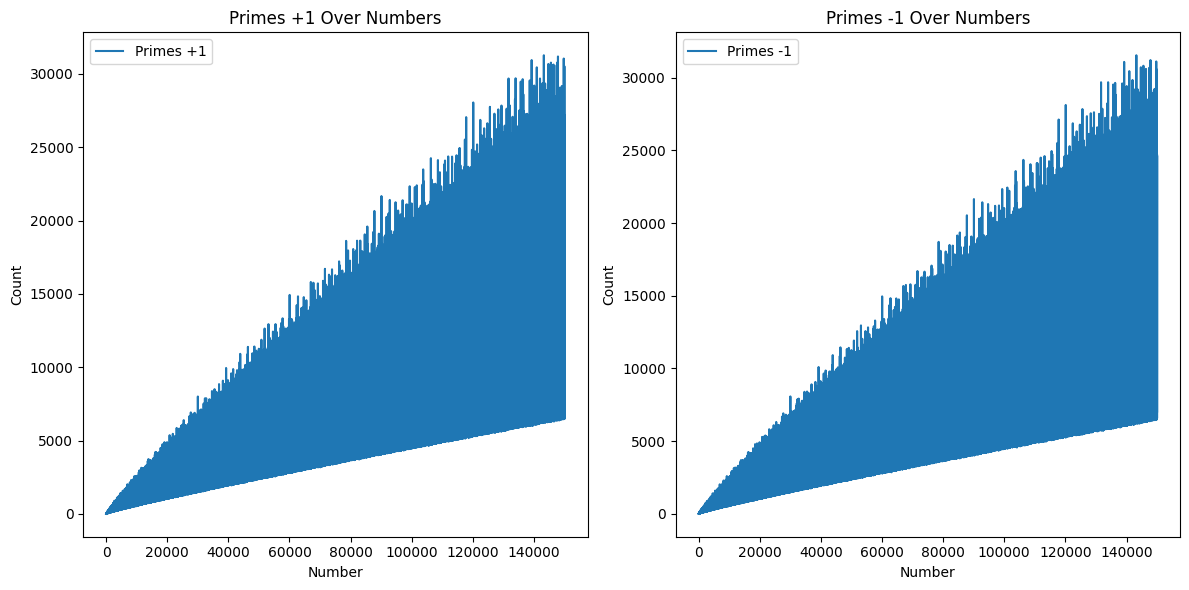

In [7]:
# Plot time series
plt.figure(figsize=(12, 6))

# Primes +1
plt.subplot(1, 2, 1)
plt.plot(data['Number'], data['Primes +1'], label='Primes +1')
plt.xlabel('Number')
plt.ylabel('Count')
plt.title('Primes +1 Over Numbers')
plt.legend()

# Primes -1
plt.subplot(1, 2, 2)
plt.plot(data['Number'], data['Primes -1'], label='Primes -1')
plt.xlabel('Number')
plt.ylabel('Count')
plt.title('Primes -1 Over Numbers')
plt.legend()

plt.tight_layout()
plt.show()

In [8]:
"""import networkx as nx

# Create graph
G = nx.Graph()

# Add nodes
G.add_nodes_from(data['Number'])

# Add edges based on shared primes
for index, row in data.iterrows():
    primes_plus = row['Primes +1']
    primes_minus = row['Primes -1']
    for index2, row2 in data.iterrows():
        if index != index2:
            if row2['Primes +1'] == primes_plus or row2['Primes -1'] == primes_minus:
                G.add_edge(row['Number'], row2['Number'])

# Plot network
plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=False, node_size=10, edge_color='gray')
plt.title('Network of Numbers Based on Shared Primes')
plt.show()"""

"import networkx as nx\n\n# Create graph\nG = nx.Graph()\n\n# Add nodes\nG.add_nodes_from(data['Number'])\n\n# Add edges based on shared primes\nfor index, row in data.iterrows():\n    primes_plus = row['Primes +1']\n    primes_minus = row['Primes -1']\n    for index2, row2 in data.iterrows():\n        if index != index2:\n            if row2['Primes +1'] == primes_plus or row2['Primes -1'] == primes_minus:\n                G.add_edge(row['Number'], row2['Number'])\n\n# Plot network\nplt.figure(figsize=(12, 8))\nnx.draw(G, with_labels=False, node_size=10, edge_color='gray')\nplt.title('Network of Numbers Based on Shared Primes')\nplt.show()"

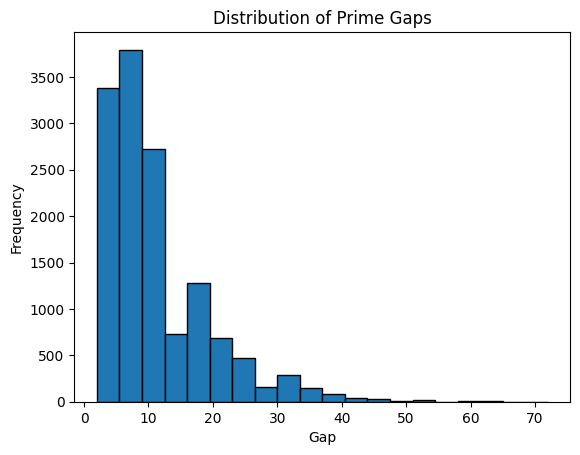

In [9]:
# Find prime numbers
primes_list = data[data['IsPrime'] == 1]['Number'].tolist()

# Calculate gaps
gaps = [primes_list[i+1] - primes_list[i] for i in range(len(primes_list)-1)]

# Plot histogram of gaps
plt.hist(gaps, bins=20, edgecolor='black')
plt.title('Distribution of Prime Gaps')
plt.xlabel('Gap')
plt.ylabel('Frequency')
plt.show()

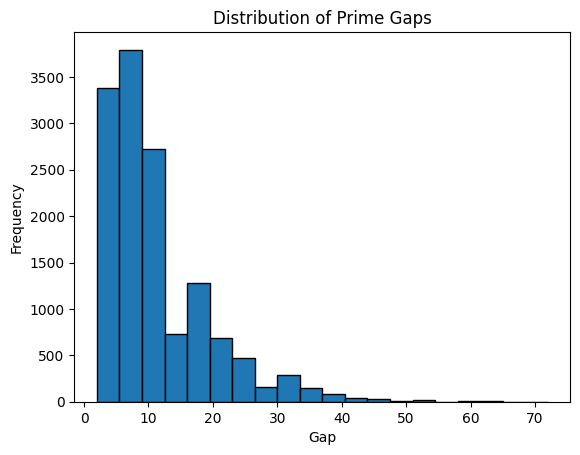

In [10]:
# Find prime numbers
primes_list = data[data['IsPrime'] == 1]['Number'].tolist()

# Calculate gaps
gaps = [primes_list[i+1] - primes_list[i] for i in range(len(primes_list)-1)]

# Plot histogram of gaps
plt.hist(gaps, bins=20, edgecolor='black')
plt.title('Distribution of Prime Gaps')
plt.xlabel('Gap')
plt.ylabel('Frequency')
plt.show()

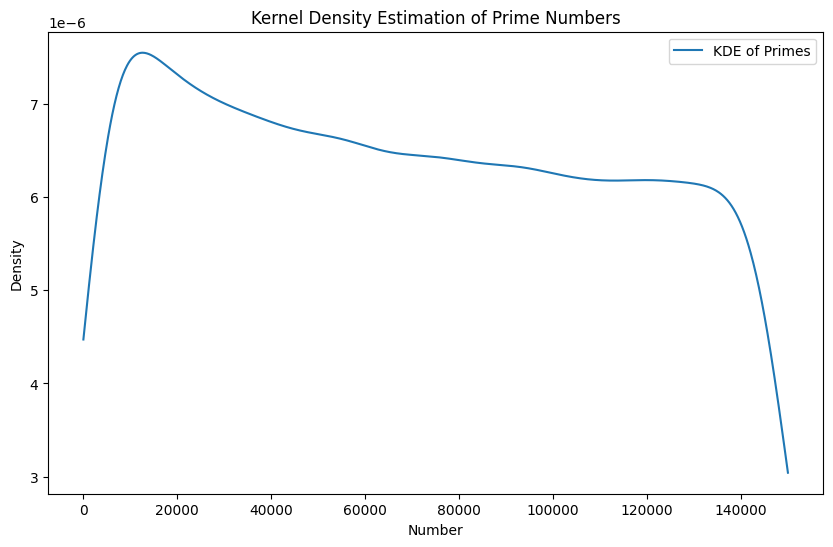

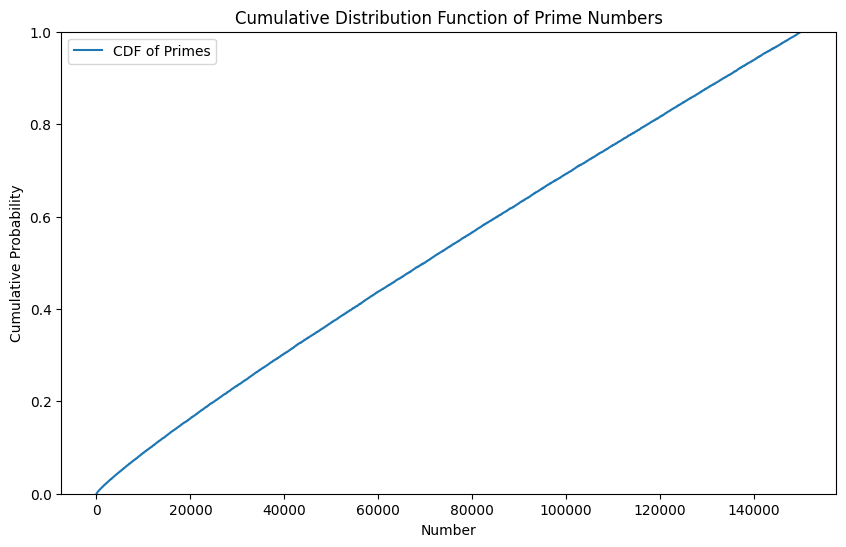

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

# Filter primes
primes = data[data['IsPrime'] == 1]['Number']

# Kernel Density Estimation (KDE) for prime distribution
kde = gaussian_kde(primes)
x = np.linspace(primes.min(), primes.max(), 1000)
plt.figure(figsize=(10, 6))
plt.plot(x, kde(x), label='KDE of Primes')
plt.title('Kernel Density Estimation of Prime Numbers')
plt.xlabel('Number')
plt.ylabel('Density')
plt.legend()
plt.show()

# Cumulative Distribution Function (CDF)
plt.figure(figsize=(10, 6))
sns.ecdfplot(primes, label='CDF of Primes')
plt.title('Cumulative Distribution Function of Prime Numbers')
plt.xlabel('Number')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

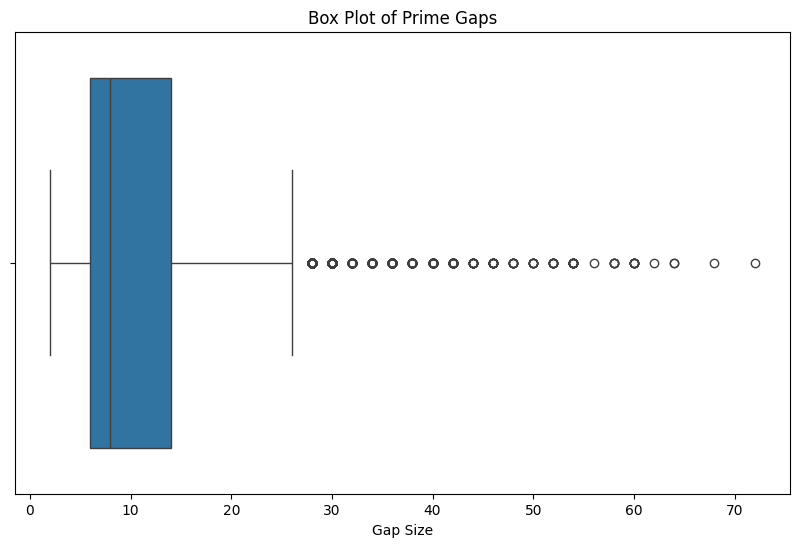

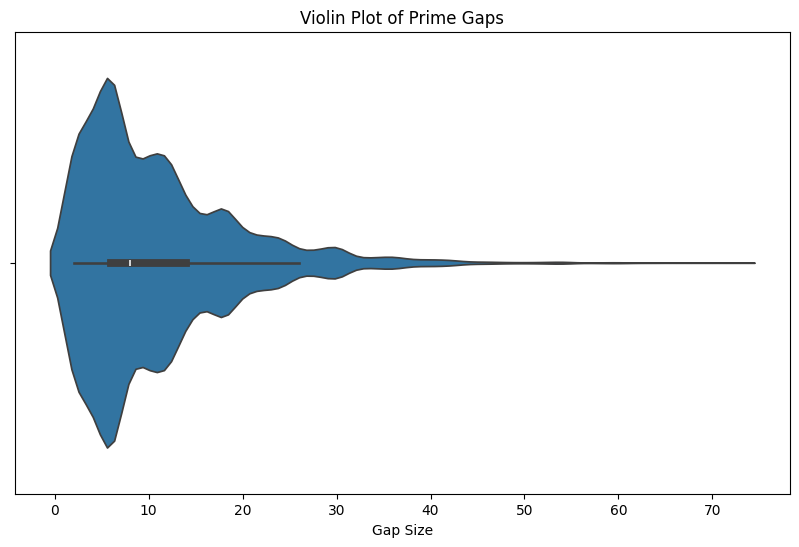

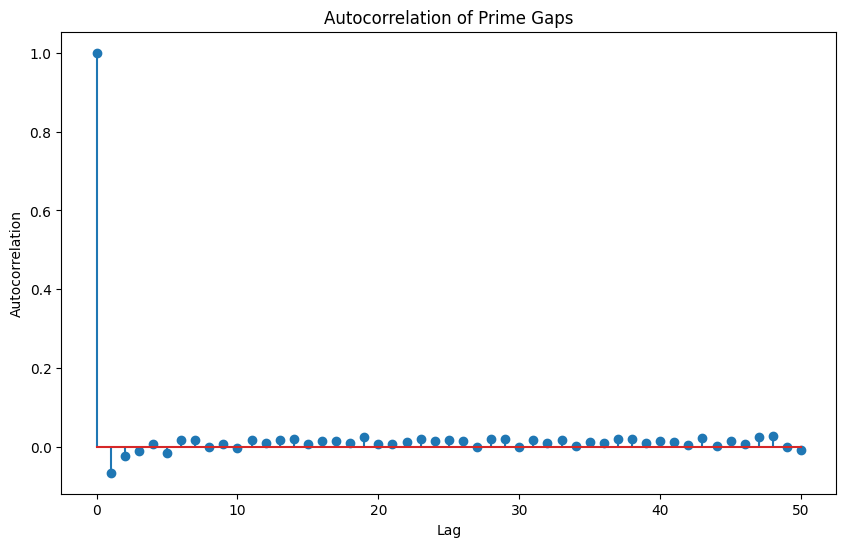

In [12]:
# Calculate prime gaps
primes_list = data[data['IsPrime'] == 1]['Number'].tolist()
gaps = [primes_list[i+1] - primes_list[i] for i in range(len(primes_list)-1)]

# Box plot of prime gaps
plt.figure(figsize=(10, 6))
sns.boxplot(x=gaps)
plt.title('Box Plot of Prime Gaps')
plt.xlabel('Gap Size')
plt.show()

# Violin plot of prime gaps
plt.figure(figsize=(10, 6))
sns.violinplot(x=gaps)
plt.title('Violin Plot of Prime Gaps')
plt.xlabel('Gap Size')
plt.show()

# Autocorrelation of prime gaps
from statsmodels.tsa.stattools import acf

acf_values = acf(gaps, nlags=50)
plt.figure(figsize=(10, 6))
plt.stem(acf_values)
plt.title('Autocorrelation of Prime Gaps')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

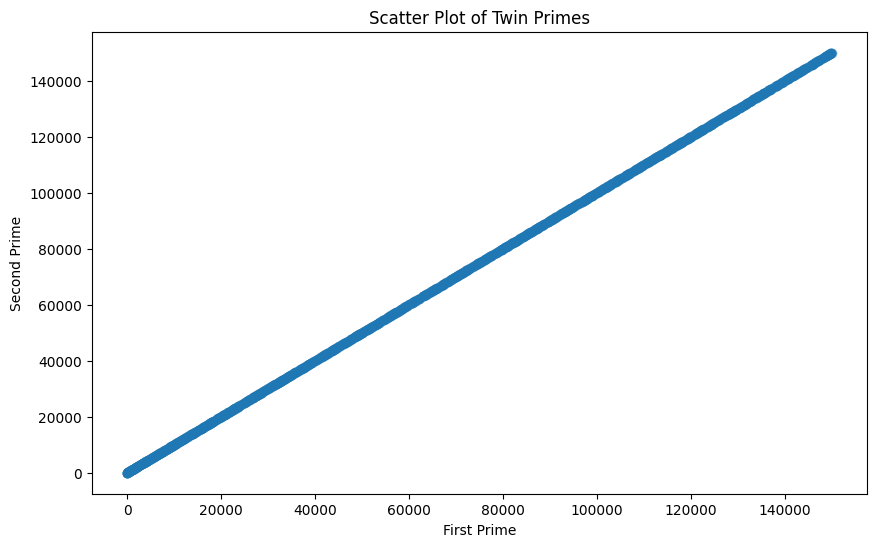

1.0 2.0 1.0 0.0 0.0


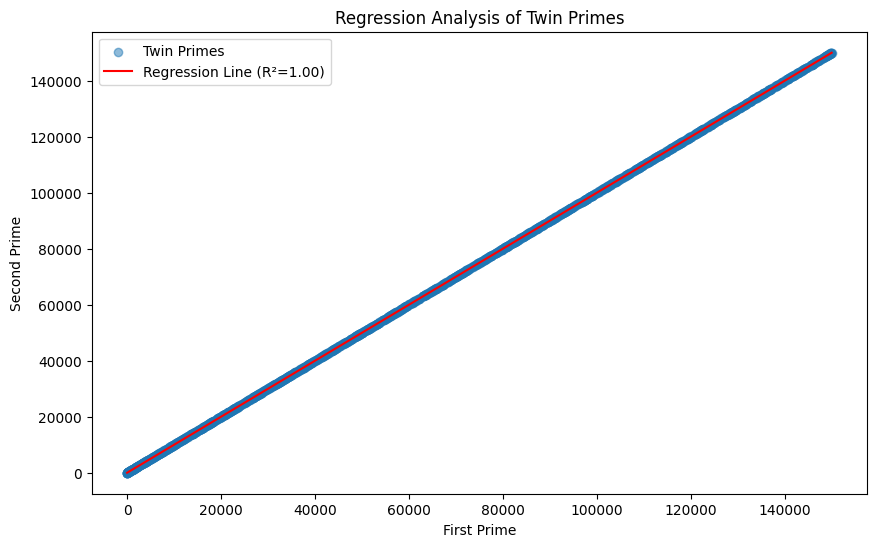

In [13]:
# Identify twin primes
twin_primes = [(primes_list[i], primes_list[i+1]) for i in range(len(primes_list)-1) if primes_list[i+1] - primes_list[i] == 2]

# Scatter plot of twin primes
twin_x = [p[0] for p in twin_primes]
twin_y = [p[1] for p in twin_primes]
plt.figure(figsize=(10, 6))
plt.scatter(twin_x, twin_y, alpha=0.5)
plt.title('Scatter Plot of Twin Primes')
plt.xlabel('First Prime')
plt.ylabel('Second Prime')
plt.show()

# Regression analysis of twin primes
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(twin_x, twin_y)
print(slope, intercept, r_value, p_value, std_err)
plt.figure(figsize=(10, 6))
plt.scatter(twin_x, twin_y, alpha=0.5, label='Twin Primes')
plt.plot(twin_x, slope * np.array(twin_x) + intercept, color='red', label=f'Regression Line (R²={r_value**2:.2f})')
plt.title('Regression Analysis of Twin Primes')
plt.xlabel('First Prime')
plt.ylabel('Second Prime')
plt.legend()
plt.show()

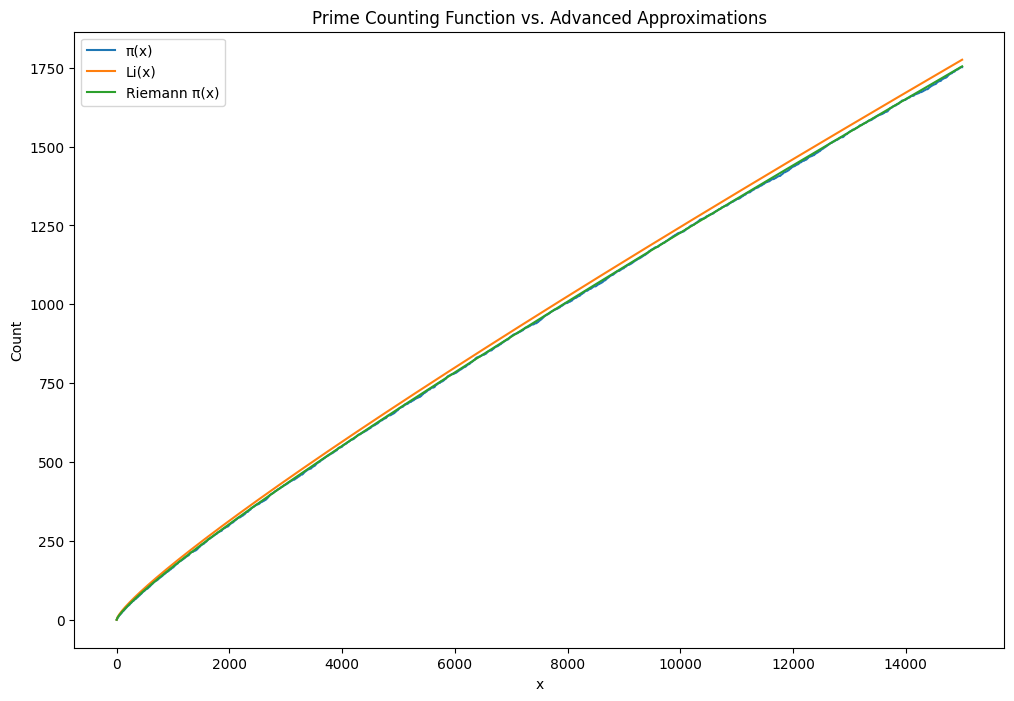

In [14]:
from scipy.integrate import quad
from scipy.special import expi
from sympy import mobius

# Prime counting function
def pi(x):
    return sum(1 for p in primes_list if p <= x)

# Logarithmic integral (Li(x))
def li(x):
    return quad(lambda t: 1 / np.log(t), 2, x)[0]

# Riemann's explicit formula (simplified)
def riemann_pi(x):
    return sum(mobius(n) * li(x**(1/n)) / n for n in range(1, int(np.log(x)/np.log(2)) + 1))

# Generate x values
x_values = np.linspace(2, 15000, 1000)

# Plot comparisons
plt.figure(figsize=(12, 8))
plt.plot(x_values, [pi(x) for x in x_values], label='π(x)')
plt.plot(x_values, [li(x) for x in x_values], label='Li(x)')
plt.plot(x_values, [riemann_pi(x) for x in x_values], label='Riemann π(x)')
plt.title('Prime Counting Function vs. Advanced Approximations')
plt.xlabel('x')
plt.ylabel('Count')
plt.legend()
plt.show()

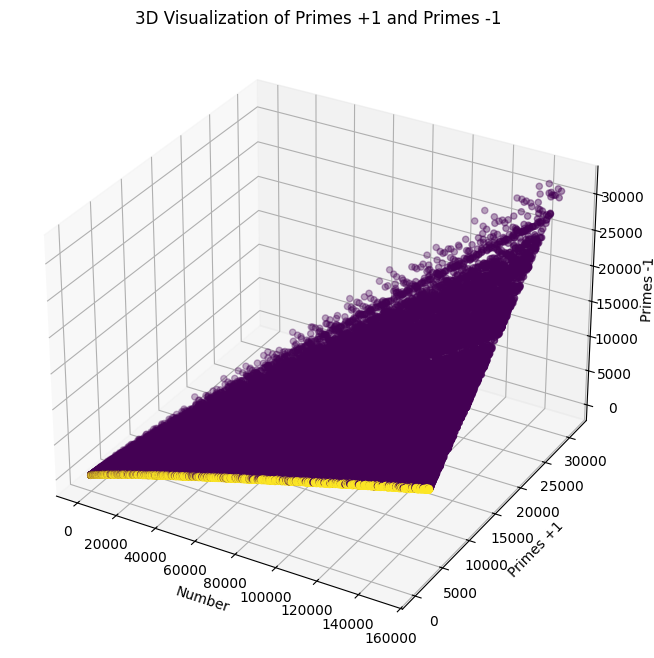

In [15]:
from mpl_toolkits.mplot3d import Axes3D

# 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Number'], data['Primes +1'], data['Primes -1'], c=data['IsPrime'], cmap='viridis')
ax.set_xlabel('Number')
ax.set_ylabel('Primes +1')
ax.set_zlabel('Primes -1')
ax.set_title('3D Visualization of Primes +1 and Primes -1')
plt.show()

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       147
           1       1.00      0.67      0.80         3

    accuracy                           0.99       150
   macro avg       1.00      0.83      0.90       150
weighted avg       0.99      0.99      0.99       150



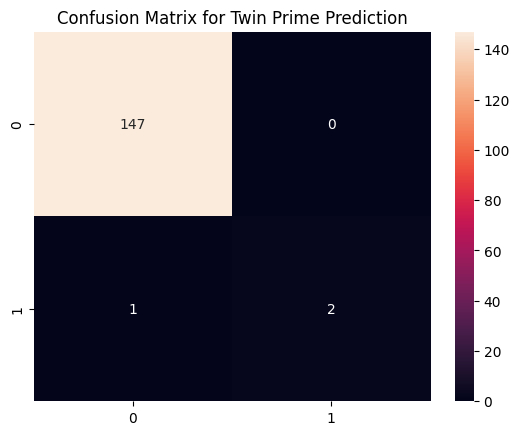

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create target variable for twin primes
data['Twins'] = data['Number'].apply(lambda x: 1 if x in twin_x or x in twin_y else 0)

# Features and target
X = data[['Primes +1', 'Primes -1', 'Number']]
y = data['Twins']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.001, random_state=2)

# Train Random Forest classifier
model = RandomForestClassifier(random_state=2)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix for Twin Prime Prediction')
plt.show()

[13.26093122 14.19357949 13.32783613 13.72165429 12.8207524  15.15456407
 13.6511612  13.80104015 13.72276547 13.84746324 13.80778933 14.02898059
 13.79099367 13.83248642 13.83765345 13.86266823 13.85728068 13.87138783
 13.8389926  13.85045539 13.85334997 13.85632165 13.85418816 13.85434636
 13.85087074 13.85341183 13.85381732 13.85387647 13.85333794 13.85329382
 13.85306218 13.85350236 13.85348862 13.85342552 13.85333886 13.85335507
 13.85336014 13.85341752 13.85339708 13.85338102 13.85337343 13.85338164
 13.85338527 13.85338997 13.85338436 13.85338236 13.85338276 13.8533846
 13.85338491 13.85338486 13.85338389 13.85338388 13.85338416 13.85338442
 13.85338435 13.85338425 13.85338415 13.8533842  13.85338426 13.85338427
 13.85338424 13.85338423 13.85338423 13.85338424 13.85338425 13.85338424
 13.85338424 13.85338424 13.85338424 13.85338424 13.85338424 13.85338424
 13.85338424 13.85338424 13.85338424 13.85338424 13.85338424 13.85338424
 13.85338424 13.85338424 13.85338424 13.85338424 13.

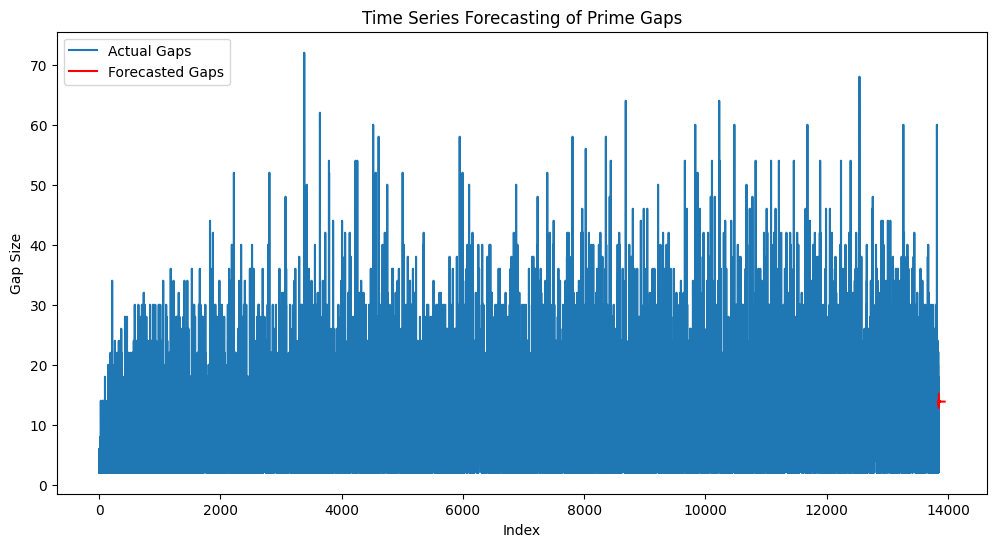

In [17]:
from statsmodels.tsa.arima.model import ARIMA

# Prime gaps as a time series
gaps = [primes_list[i+1] - primes_list[i] for i in range(len(primes_list)-1)]

# Fit ARIMA model
model = ARIMA(gaps, order=(5, 1, 0))  # ARIMA(p, d, q)
model_fit = model.fit()

# Forecast future gaps
forecast_steps = 100
forecast = model_fit.forecast(steps=forecast_steps)
print(forecast)

# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(gaps, label='Actual Gaps')
plt.plot(range(len(gaps), len(gaps) + forecast_steps), forecast, label='Forecasted Gaps', color='red')
plt.title('Time Series Forecasting of Prime Gaps')
plt.xlabel('Index')
plt.ylabel('Gap Size')
plt.legend()
plt.show()

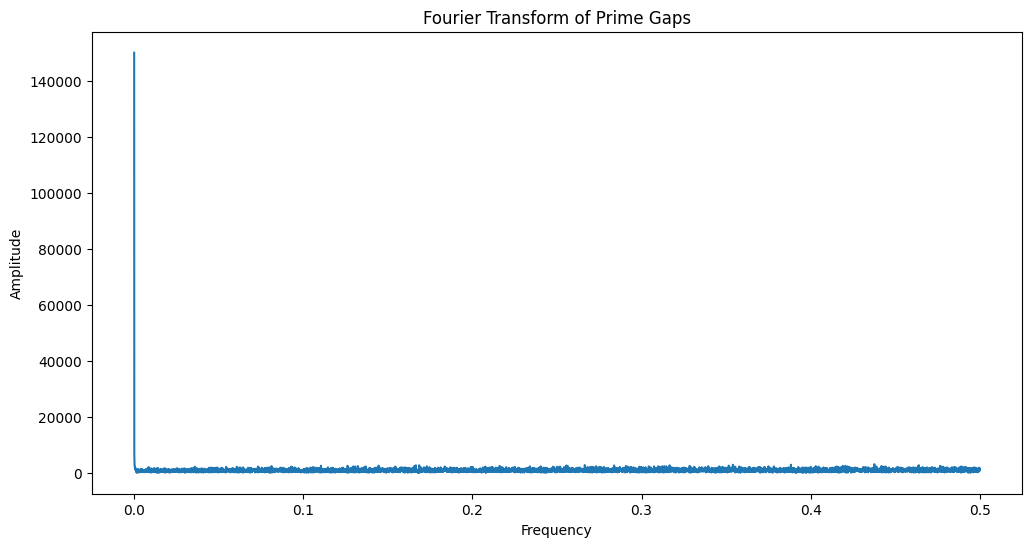

In [18]:
from scipy.fft import fft

# Compute FFT of prime gaps
fft_values = fft(gaps)
frequencies = np.fft.fftfreq(len(gaps))

# Plot FFT
plt.figure(figsize=(12, 6))
plt.plot(frequencies[:len(gaps)//2], np.abs(fft_values[:len(gaps)//2]))
plt.title('Fourier Transform of Prime Gaps')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

In [19]:
"""from ripser import Rips
from persim import plot_diagrams

# Represent primes as points in 2D space (e.g., (p, p % k) for some k)
primes_points = np.array([[p, p % 10] for p in primes_list])

# Compute persistent homology
rips = Rips()
diagrams = rips.fit_transform(primes_points)

# Plot persistence diagrams
plt.figure(figsize=(10, 6))
plot_diagrams(diagrams, show=True)
plt.title('Persistence Diagrams of Prime Numbers')
plt.show()"""

"from ripser import Rips\nfrom persim import plot_diagrams\n\n# Represent primes as points in 2D space (e.g., (p, p % k) for some k)\nprimes_points = np.array([[p, p % 10] for p in primes_list])\n\n# Compute persistent homology\nrips = Rips()\ndiagrams = rips.fit_transform(primes_points)\n\n# Plot persistence diagrams\nplt.figure(figsize=(10, 6))\nplot_diagrams(diagrams, show=True)\nplt.title('Persistence Diagrams of Prime Numbers')\nplt.show()"

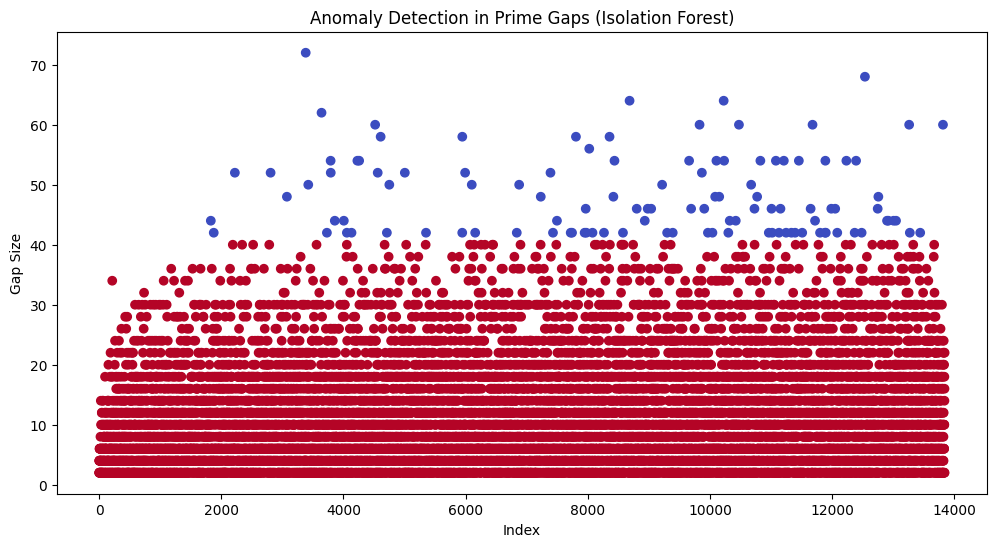

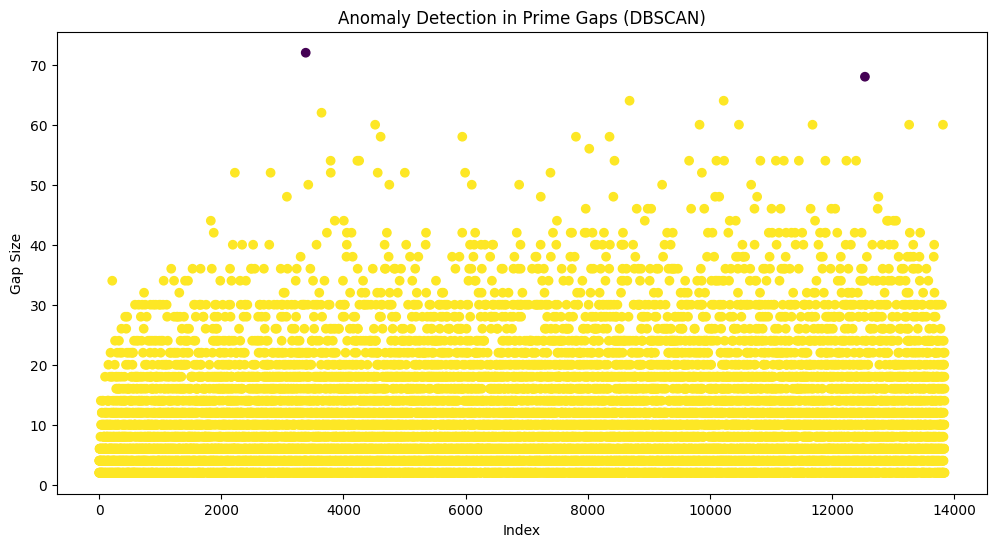

In [21]:
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN

# Anomaly detection using Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
anomalies = iso_forest.fit_predict(np.array(gaps).reshape(-1, 1))

# Plot anomalies
plt.figure(figsize=(12, 6))
plt.scatter(range(len(gaps)), gaps, c=anomalies, cmap='coolwarm')
plt.title('Anomaly Detection in Prime Gaps (Isolation Forest)')
plt.xlabel('Index')
plt.ylabel('Gap Size')
plt.show()

# Anomaly detection using DBSCAN
dbscan = DBSCAN(eps=2, min_samples=5)
clusters = dbscan.fit_predict(np.array(gaps).reshape(-1, 1))

# Plot clusters
plt.figure(figsize=(12, 6))
plt.scatter(range(len(gaps)), gaps, c=clusters, cmap='viridis')
plt.title('Anomaly Detection in Prime Gaps (DBSCAN)')
plt.xlabel('Index')
plt.ylabel('Gap Size')
plt.show()

In [20]:
"""from ripser import Rips
from persim import plot_diagrams

# Represent primes as points in 2D space (e.g., (p, p % k) for some k)
primes_points = np.array([[p, p % 10] for p in primes_list])

# Compute persistent homology
rips = Rips()
diagrams = rips.fit_transform(primes_points)

# Plot persistence diagrams
plt.figure(figsize=(10, 6))
plot_diagrams(diagrams, show=True)
plt.title('Persistence Diagrams of Prime Numbers')
plt.show()"""

"from ripser import Rips\nfrom persim import plot_diagrams\n\n# Represent primes as points in 2D space (e.g., (p, p % k) for some k)\nprimes_points = np.array([[p, p % 10] for p in primes_list])\n\n# Compute persistent homology\nrips = Rips()\ndiagrams = rips.fit_transform(primes_points)\n\n# Plot persistence diagrams\nplt.figure(figsize=(10, 6))\nplot_diagrams(diagrams, show=True)\nplt.title('Persistence Diagrams of Prime Numbers')\nplt.show()"

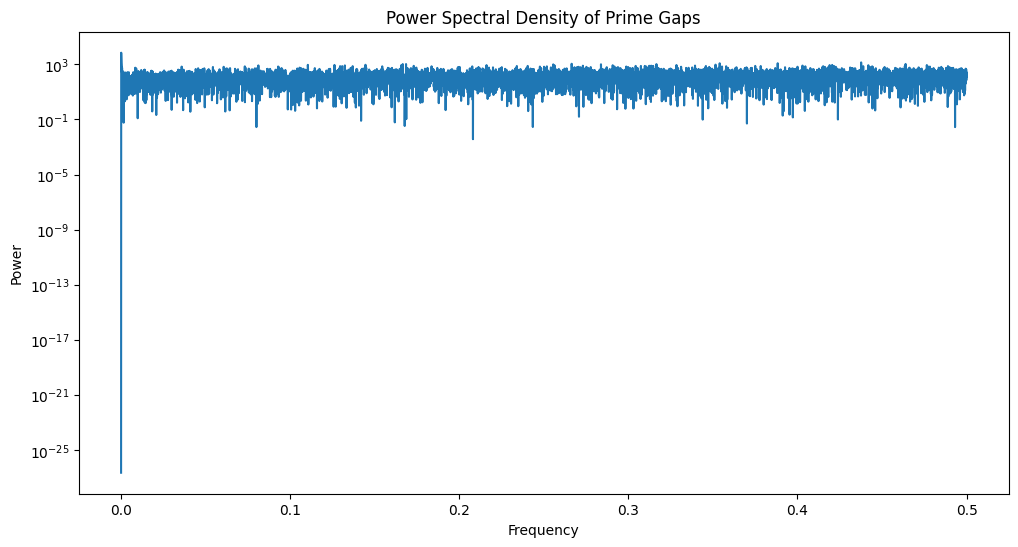

In [23]:
from scipy.signal import periodogram

# Compute power spectral density (PSD)
frequencies, psd = periodogram(gaps)

# Plot PSD
plt.figure(figsize=(12, 6))
plt.semilogy(frequencies, psd)
plt.title('Power Spectral Density of Prime Gaps')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.show()

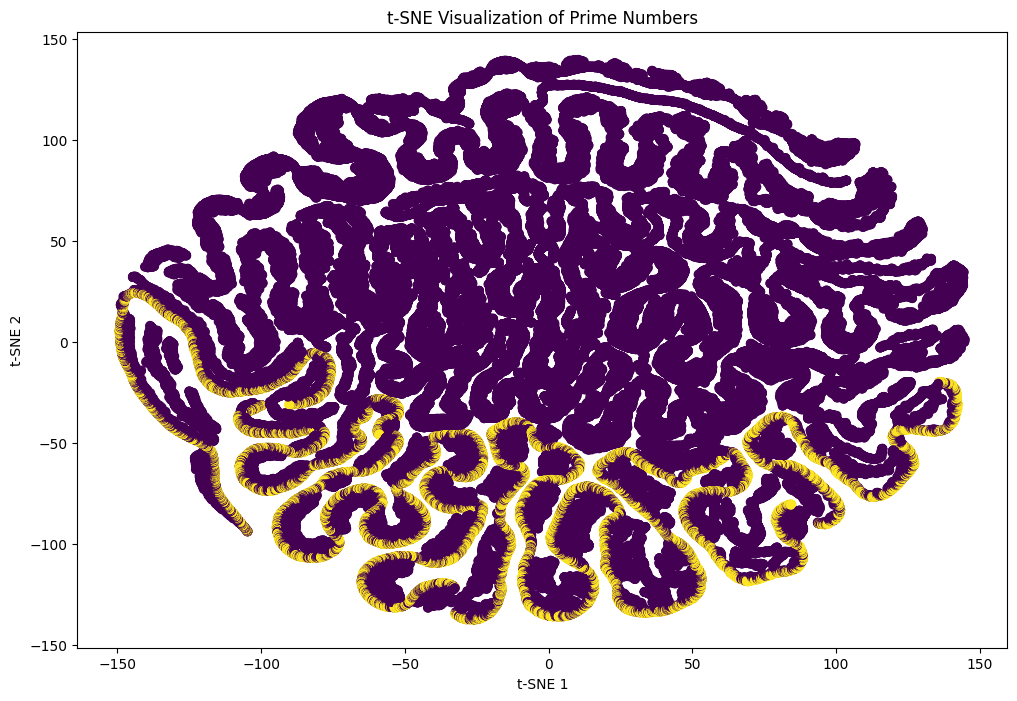

In [26]:
from sklearn.manifold import TSNE

# Features for clustering
features = data[['Primes +1', 'Primes -1', 'Number']]

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=2)
tsne_results = tsne.fit_transform(features)

# Plot t-SNE results
plt.figure(figsize=(12, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=data['IsPrime'], cmap='viridis')
plt.title('t-SNE Visualization of Prime Numbers')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()